In [1]:
import librosa
import librosa.display

from IPython import display
from glob import glob

In [2]:
from vai_.utils.utils import summarize_tensor, randpick

In [3]:
jtplot.style(fscale=2, figsize=(15, 10), context='notebook')

In [4]:
sample_rate = 22050

In [5]:
filenames = glob('/home/vaisakh/.data/LJSpeech/wavs/*.wav')

In [6]:
def audio_mix(freqs, noise=0.01, amps=None):
    t = np.linspace(0, 5, sample_rate*5)
    if amps is None: amps = [1] * len(freqs)
    y = np.sum([a * np.sin(f * 2 * np.pi * t) for a, f in zip(amps, freqs)], 0)
    if noise: y += np.random.randn(len(y)) * noise
    return t, y

In [7]:
def load_data(fake=False):
    if fake:
        return audio_mix([500, 600])

    y = librosa.load(randpick(filenames))[0]
    t = np.arange(len(y)) / sample_rate
    return t, y

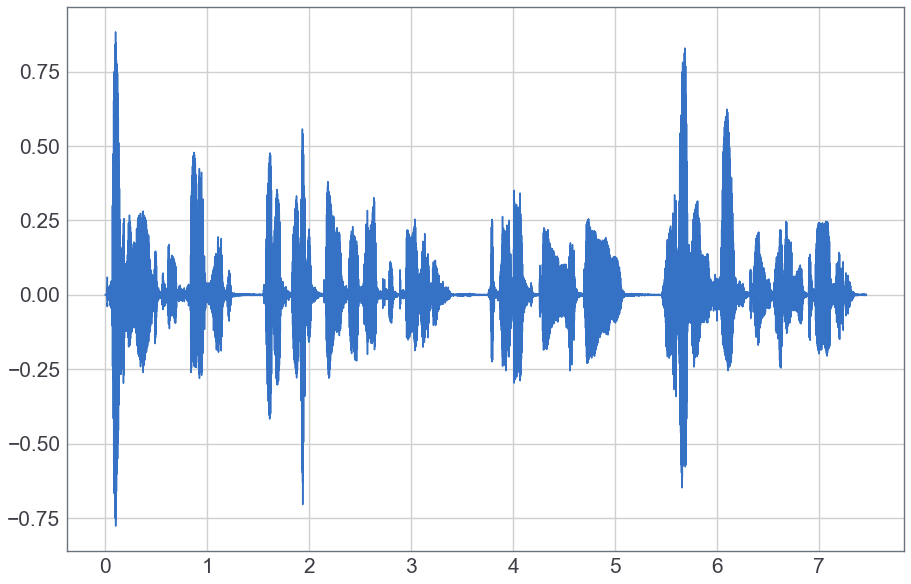

In [8]:
t, y = load_data()
w = np.abs(np.fft.rfft(y))
f = np.arange(len(w)) * sample_rate / len(w) / 2

plot(t, y)
plt.show()
display.Audio(y, rate=sample_rate)

In [9]:
n_fft=int(50*1e-3*sample_rate)
hop_length = int(12.5*1e-3*sample_rate)
spectrogram = librosa.feature.melspectrogram(y, n_fft=int(50*1e-3*sample_rate), hop_length=hop_length,
                                n_mels=80, fmin=125, fmax=7.6*1e3, power=1.0)

In [10]:
spectrogram.shape

(80, 599)

/home/vaisakh/anaconda3/lib/python3.6/site-packages/librosa/display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


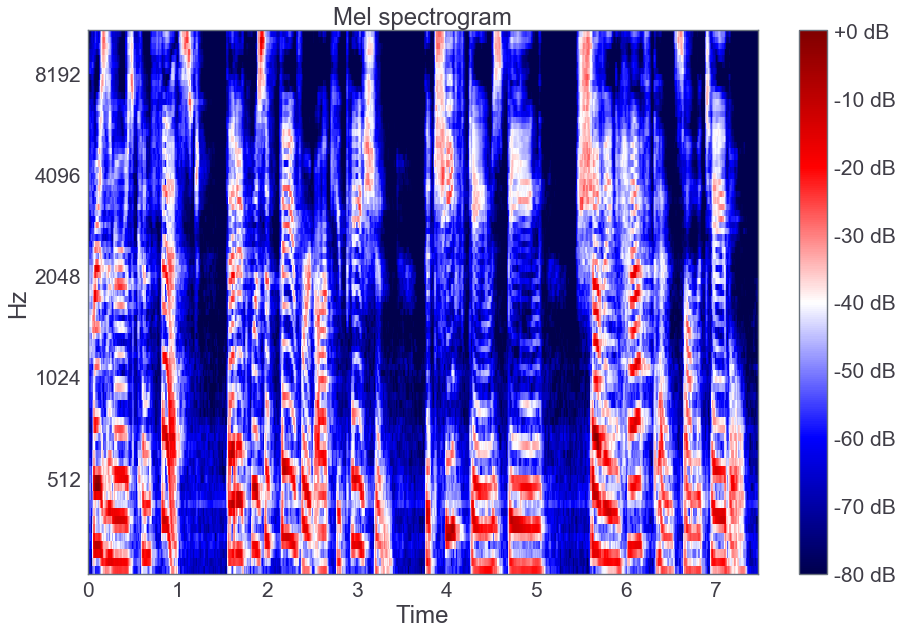

In [11]:
librosa.display.specshow(librosa.amplitude_to_db(spectrogram,
                                                 ref=np.max),
                        sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.title('Mel spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.set_cmap('seismic')
plt.show()